In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pyflux as pf
%matplotlib inline

from numpy import genfromtxt
from scipy.stats import multivariate_normal
from sklearn.metrics import f1_score

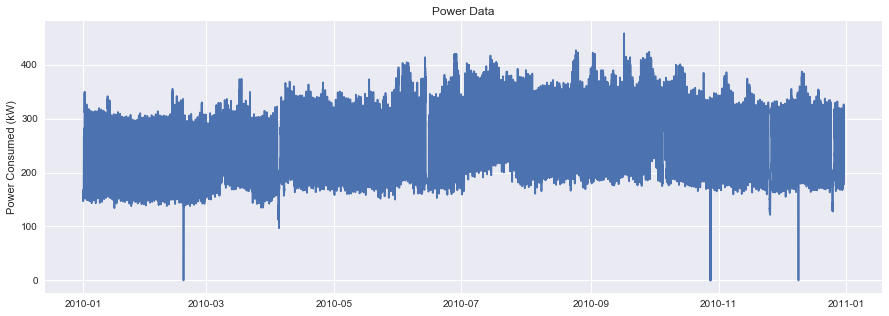

In [17]:
from datetime import datetime


data = pd.read_csv('data.csv')
data.index = data['Timestamp'].values
data.index = pd.to_datetime(data.index)


plt.figure(figsize=(15,5))
plt.plot(data.index,data['Power'])
plt.ylabel('Power Consumed (kW)')
plt.title('Power Data');

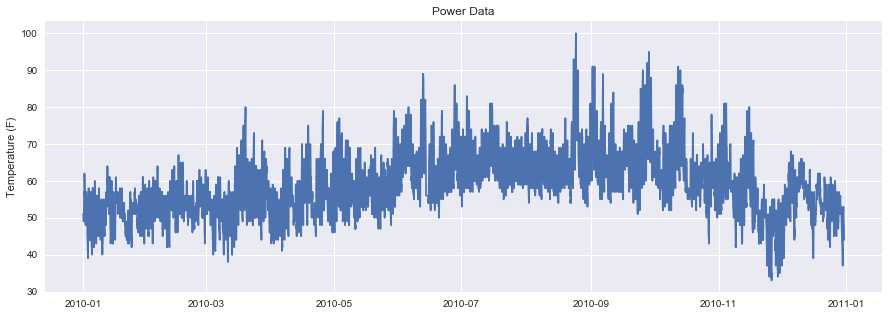

In [18]:
plt.figure(figsize=(15,5))
plt.plot(data.index,data['OAT'])
plt.ylabel('Temperature (F)')
plt.title('Power Data');

In [9]:
model = pf.ARIMA(data=data, ar=4, ma=4, target='Power', family=pf.Normal())

In [10]:
x = model.fit("MLE")
x.summary()

Normal ARIMA(4,0,4)                                                                                       
======================================================= ==================================================
Dependent Variable: Power                               Method: MLE                                       
Start Date: 2010-01-01 02:15:00                         Log Likelihood: -156349.2248                      
End Date: 2010-12-31 00:00:00                           AIC: 312718.4496                                  
Number of observations: 34936                           BIC: 312803.0623                                  
Latent Variable                          Estimate   Std Error  z        P>|z|    95% C.I.                 
======================================== ========== ========== ======== ======== =========================
Constant                                 261.6246   15.0322    17.4043  0.0      (232.1615 | 291.0877)    
AR(1)                                

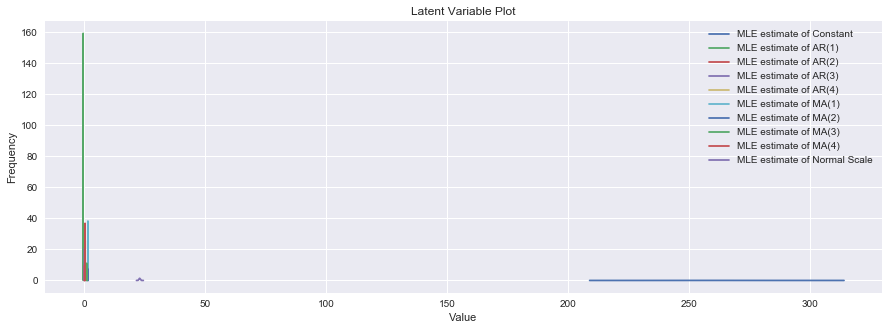

In [11]:
model.plot_z(figsize=(15,5))

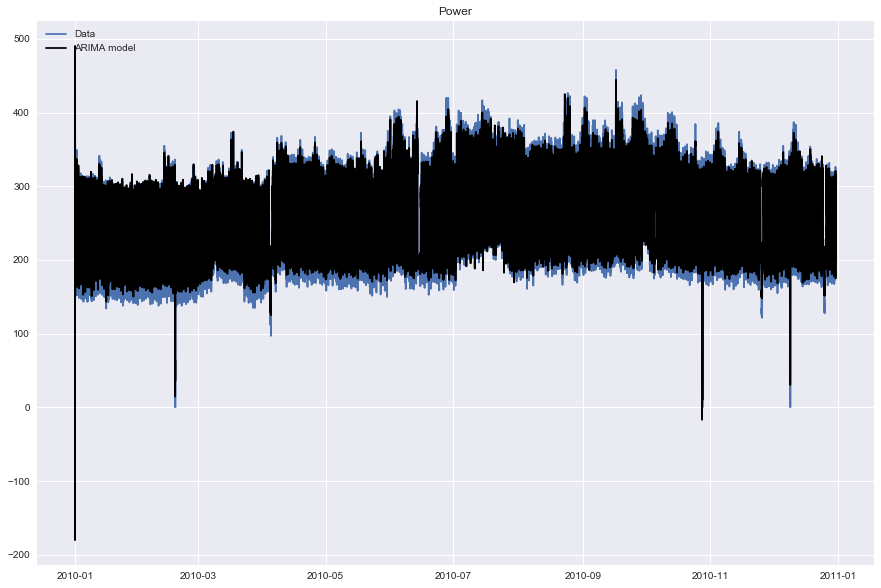

In [12]:
model.plot_fit(figsize=(15,10))

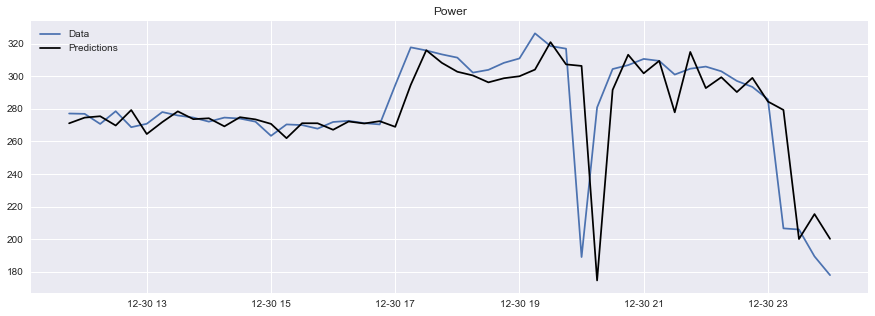

In [13]:
model.plot_predict_is(h=50, figsize=(15,5))

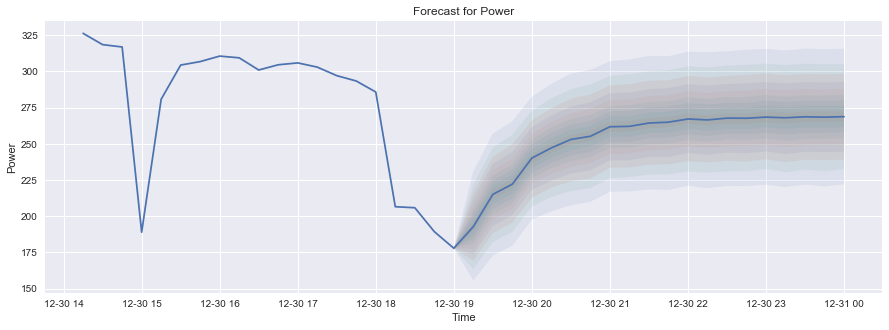

In [14]:
model.plot_predict(h=20,past_values=20,figsize=(15,5))